In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import sqlite3
from google.cloud import storage
import numpy as np
import requests
from matplotlib import pyplot as plt
import lxml
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Extract data CSV, JSON, XML, DB dan API

In [4]:
# Extract CSV 
data1 = pd.read_csv("electricity_access_percent.csv")
data2 = pd.read_csv("gdp_data.csv")
data3 = pd.read_csv("mystery.csv", encoding='utf-16')
data4 = pd.read_csv("population_data.csv")
data5 = pd.read_csv("projects_data.csv")
data6 = pd.read_csv("rural_population_percent.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9924\1865546885.py:6: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  data5 = pd.read_csv("projects_data.csv")


In [5]:
# Extract JSON
data_json = pd.read_json("population_data.json")

In [6]:
with open("population_data.xml", "r") as f:
        data_xml = f.read()

# Parse XML using Beautiful Soup
soup_population_data_xml = BeautifulSoup(data_xml, "lxml")

# Extract data from XML and store in a list of dictionaries
countries = []
items = []
years = []
values = []

for record in soup_population_data_xml.find_all('record'):
    country = record.find("field", {"name": "Country or Area"}).text
    item =  record.find("field", {"name": "Item"}).text

    year1 =  record.find("field", {"name": "Year"})
    year = int(year1.text) if year1.text else None

    value1 =  record.find("field", {"name": "Value"})
    value = int(value1.text) if value1.text else None

    countries.append(country)
    items.append(item)
    years.append(year)
    values.append(value)

data = {
    "Country": countries,
    "Item": item,
    "Year": year,
    "Value": values
}

data_xml = pd.DataFrame(data)

In [7]:
# Extract SQL
conn = sqlite3.connect("population_data.db")
data_db = pd.read_sql("SELECT * FROM population_data", conn)


In [8]:
# Extract API
url = 'http://api.worldbank.org/v2/countries/br;cn;us;id/indicators/SP.POP.TOTL/?format=json&per_page=1000'

data_API = requests.get(url)

print(data_API.json())

[{'page': 1, 'pages': 1, 'per_page': 1000, 'total': 256, 'sourceid': '2', 'lastupdated': '2024-03-28'}, [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2023', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2022', 'value': 215313498, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2021', 'value': 214326223, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'BR', 'value': 'Brazil'}, 'countryiso3code': 'BRA', 'date': '2020', 'value': 213196304, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP

## Cleaning Data, check data type, missing values, assign value 0 and remove duplicate data

In [9]:
dataframe= [data1, data2, data3, data4, data5, data6, data_db, data_json, data_xml]
for data in dataframe:
    print("\nData Type : ")
    print(data.dtypes)

    print("\nPeriksa data yang hilang : ")
    print(data.isnull().sum())

    print("\nBeri 0 pada data yang hilang : ")
    print(data.fillna(0))

    print("\nHapus data duplikat : ") 
    print( data.drop_duplicates())
    display(data.head())


Data Type : 
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Periksa data yang hilang : 
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to ele

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN



Data Type : 
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Periksa data yang hilang : 
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
     Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   
4         Andorra     

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,0.0
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,0.0
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,0.0
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,0.0



Data Type : 
No                  int64
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 63, dtype: object

Periksa data yang hilang : 
No                0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
      No  Country Name Country Code     Indicator Name Indicator Code  \
0      0         Aruba          ABW  Population, total    SP.POP.TOTL   
1      1   Afghanistan          AFG  Population, total    SP.POP.TOTL   
2      2        Angola          AGO  Population, total    SP.POP.TOTL   
3      3       Albania          ALB  Population, total    SP.POP.TOTL   
4 

,No,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0



Data Type : 
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Periksa data yang hilang : 
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania        

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN



Data Type : 
id                           object
regionname                   object
countryname                  object
prodline                     object
lendinginstr                 object
lendinginstrtype             object
envassesmentcategorycode     object
supplementprojectflg         object
productlinetype              object
projectstatusdisplay         object
status                       object
project_name                 object
boardapprovaldate            object
board_approval_month         object
closingdate                  object
lendprojectcost              object
ibrdcommamt                  object
idacommamt                   object
totalamt                     object
grantamt                     object
borrower                     object
impagency                    object
url                          object
projectdoc                  float64
majorsector_percent         float64
sector1                      object
sector2                      object
sector3       

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN



Data Type : 
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Periksa data yang hilang : 
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
     Country Name Country Code                            Indicator Name  \
0           Aruba          ABW  Rural population (% of total population)   
1     Afghanistan          AFG  Rural population (% of total population)   
2          Angola          AGO  Rural population (% of total population)   
3         Albania          ALB  Rural pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN



Data Type : 
index               int64
Country_Name       object
Country_Code       object
Indicator_Name     object
Indicator_Code     object
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 63, dtype: object

Periksa data yang hilang : 
index             0
Country_Name      0
Country_Code      0
Indicator_Name    0
Indicator_Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
     index  Country_Name Country_Code     Indicator_Name Indicator_Code  \
0        0         Aruba          ABW  Population, total    SP.POP.TOTL   
1        1   Afghanistan          AFG  Population, total    SP.POP.TOTL   
2        2        Angola          AGO  Population, total    SP.POP.TOTL   
3        3       Albania          ALB  Population, total    SP.POP.

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0



Data Type : 
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

Periksa data yang hilang : 
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

Beri 0 pada data yang hilang : 
     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, tot

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0



Data Type : 
Country     object
Item        object
Year         int64
Value      float64
dtype: object

Periksa data yang hilang : 
Country      0
Item         0
Year         0
Value      165
dtype: int64

Beri 0 pada data yang hilang : 
        Country               Item  Year       Value
0         Aruba  Population, total  2017     54211.0
1         Aruba  Population, total  2017     55438.0
2         Aruba  Population, total  2017     56225.0
3         Aruba  Population, total  2017     56695.0
4         Aruba  Population, total  2017     57032.0
...         ...                ...   ...         ...
15307  Zimbabwe  Population, total  2017  15054506.0
15308  Zimbabwe  Population, total  2017  15411675.0
15309  Zimbabwe  Population, total  2017  15777451.0
15310  Zimbabwe  Population, total  2017  16150362.0
15311  Zimbabwe  Population, total  2017  16529904.0

[15312 rows x 4 columns]

Hapus data duplikat : 
        Country               Item  Year       Value
0         Aruba  Popul

,Country,Item,Year,Value
0,Aruba,"Population, total",2017,54211.0
1,Aruba,"Population, total",2017,55438.0
2,Aruba,"Population, total",2017,56225.0
3,Aruba,"Population, total",2017,56695.0
4,Aruba,"Population, total",2017,57032.0


## Combine data from rural_population_percent.csv and electricity_access_percent.csv

In [10]:
combine = pd.concat([data1,data6]) 
print("\nData Type : ")
print(combine.dtypes)

print("\nPeriksa data yang hilang : ")
print(combine.isnull().sum())

print("\nBeri 0 pada data yang hilang : ")
print(combine.fillna(0))

print("\nHapus data duplikat : ") 
print(combine.drop_duplicates())
display(combine.head())


Data Type : 
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Periksa data yang hilang : 
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              269
                 ... 
2014                7
2015                7
2016                7
2017              268
Unnamed: 62       528
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
     Country Name Country Code                            Indicator Name  \
0           Aruba          ABW   Access to electricity (% of population)   
1     Afghanistan          AFG   Access to electricity (% of population)   
2          Angola          AGO   Access to electricity (% of population)   
3         Albania          ALB   Access t

     Country Name Country Code                            Indicator Name  \
0           Aruba          ABW   Access to electricity (% of population)   
1     Afghanistan          AFG   Access to electricity (% of population)   
2          Angola          AGO   Access to electricity (% of population)   
3         Albania          ALB   Access to electricity (% of population)   
4         Andorra          AND   Access to electricity (% of population)   
..            ...          ...                                       ...   
259        Kosovo          XKX  Rural population (% of total population)   
260   Yemen, Rep.          YEM  Rural population (% of total population)   
261  South Africa          ZAF  Rural population (% of total population)   
262        Zambia          ZMB  Rural population (% of total population)   
263      Zimbabwe          ZWE  Rural population (% of total population)   

     Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0    EG.ELC

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


## Dataset type adjustment

In [11]:
# population_data.csv
# Mengonversi kolom tahun menjadi numerik population_data.csv
data4[data4.columns[4:]] = data4[data4.columns[4:]].apply(pd.to_numeric, errors='coerce')

# Mengonversi kolom "Country Name" dan "Indicator Name" menjadi string
data4["Country Name"] = data4["Country Name"].astype(str)
data4["Indicator Name"] = data4["Indicator Name"].astype(str)
data4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [12]:
# projects_data.csv
# Menghapus baris yang memiliki nilai yang tidak valid di kolom 'id'
data5 = data5.dropna(subset=['id'])
# Mengonversi kolom dengan tipe data float
# data5['lendprojectcost'] = data5['lendprojectcost'].astype(float)
# data5['ibrdcommamt'] = data5['ibrdcommamt'].astype(float)
# data5['idacommamt'] = data5['idacommamt'].astype(float)
# data5['totalamt'] = data5['totalamt'].astype(float)
# data5['grantamt'] = data5['grantamt'].astype(float)

# Mengonversi kolom dengan tipe data datetime
data5['boardapprovaldate'] = pd.to_datetime(data5['boardapprovaldate'])
data5['closingdate'] = pd.to_datetime(data5['closingdate'], errors='coerce')
data5

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# population_data.json
data_json[data.columns[4:]] = data_json[data.columns[4:]].apply(pd.to_numeric, errors='coerce')

# Mengonversi kolom "Country Name", "Country Code", "Indicator Name", "Indicator Code" menjadi string
data_json["Country Name"] = data_json["Country Name"].astype(str)
data_json["Country Code"] = data_json["Country Code"].astype(str)
data_json["Indicator Name"] = data_json["Indicator Name"].astype(str)
data_json["Indicator Code"] = data_json["Indicator Code"].astype(str)
data_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [14]:
# population_data.xml
# Mengonversi kolom "Country or Area" dan "Item" menjadi string
data_xml["Country or Area"] = data_xml["Country"].astype(str)
data_xml["Item"] = data_xml["Item"].astype(str)
data_xml.head()

,Country,Item,Year,Value,Country or Area
0,Aruba,"Population, total",2017,54211.0,Aruba
1,Aruba,"Population, total",2017,55438.0,Aruba
2,Aruba,"Population, total",2017,56225.0,Aruba
3,Aruba,"Population, total",2017,56695.0,Aruba
4,Aruba,"Population, total",2017,57032.0,Aruba


In [15]:
# population_data.db
data_db['Country_Name'] = data_db['Country_Name'].astype(str)
data_db['Country_Code'] = data_db['Country_Code'].astype(str)
data_db['Indicator_Name'] = pd.to_numeric(data_db['Indicator_Name'], errors='coerce')
data_db['Indicator_Code'] = pd.to_numeric(data_db['Indicator_Code'], errors='coerce')
data_db.head()

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,NaN,NaN,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,NaN,NaN,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,NaN,NaN,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,NaN,NaN,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,NaN,NaN,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


## Imputing Data

In [16]:
# Mengisi nilai yang hilang dengan SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_num = data2.select_dtypes(include=['float64'])
data_imputed = pd.DataFrame(imputer.fit_transform(data_num), columns=data_num.columns)
data2[data_num.columns] = data_imputed

# Mengisi nilai yang hilang dengan fillna
data = data2.fillna(0)
data2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,0.0
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,0.0
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,0.0
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,0.0


## Dummy Variables 

In [17]:
# Membuat data Dummy population.csv
population_csv = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
dummy_variables = pd.get_dummies(data4[population_csv])

# Combine the original data with the dummy variables
data_dummy = data4.join(dummy_variables)

In [18]:
# Membuat data Dummy population.json
population_json = ['Country Name', 'Indicator Name']
dummy_variables = pd.get_dummies(data_json[population_json])

data_dum_json = data_json.join(dummy_variables)

## Replace dan Regex 

In [19]:
data5 = data5.replace({'regionname': 'Region_name', 'countryname': 'Country_Name'}, regex=True)

# Penggantian menggunakan regex()
data5.columns = data5.columns.str.replace('regionname', 'Region_name', regex=True)
data5.columns = data5.columns.str.replace('countryname', 'Country_Name', regex=True)
data5.head()




,id,Region_name,Country_Name,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


## Removing Outliers

In [20]:
# Identifikasi kolom numerik
numeric_cols = ['Country Name', 'Country Code', 'Indicator Code']

# Metode IQR untuk menghapus outliers
def remove_outliers_iqr(data4, column):
    Q1 =data4[column].quantile(0.25)
    Q3 = data4[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = data4[(data4[column] >= lower_bound) & (data4[column] <= upper_bound)]
    return df_filtered

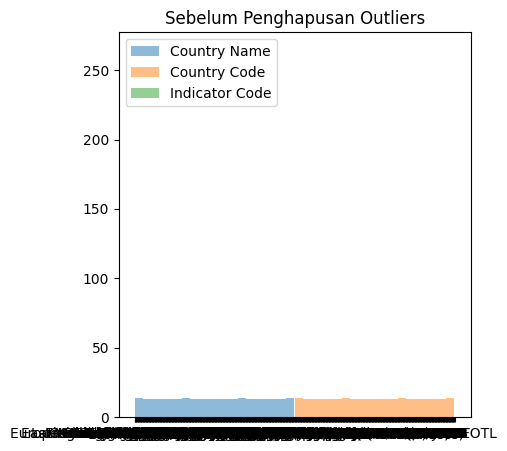

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for col in numeric_cols:
    plt.hist(data4[col], bins=20, alpha=0.5, label=col)
plt.title('Sebelum Penghapusan Outliers')
plt.legend()

In [ ]:
data_cleaned_iqr = data4.copy()
for col in numeric_cols:
    data_cleaned_iqr = remove_outliers_iqr(data_cleaned_iqr, col)

# Visualisasi data setelah penghapusan outliers dengan IQR
plt.subplot(1, 2, 2)
for col in numeric_cols:
    plt.hist(data_cleaned_iqr[col], bins=20, alpha=0.5, label=col)
plt.title('Setelah Penghapusan Outliers (IQR)')
plt.legend()

plt.tight_layout()
plt.show()

## Scaling Features

In [ ]:
# Pilih fitur yang akan di-scaling (misalnya 'lendprojectcost' dan 'totalamt')
features_to_scale = ['Value']

# StandardScaler
scaler_standard = StandardScaler()
data_standard_scaled = data_xml.copy()
data_standard_scaled[features_to_scale] = scaler_standard.fit_transform(data_standard_scaled[features_to_scale])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax_scaled = data_xml.copy()
data_minmax_scaled[features_to_scale] = scaler_minmax.fit_transform(data_minmax_scaled[features_to_scale])
data_minmax_scaled.head()

,Country,Item,Year,Value,Country or Area
15307,Zimbabwe,"Population, total",2017,0.001999,Zimbabwe
15308,Zimbabwe,"Population, total",2017,0.002046,Zimbabwe
15309,Zimbabwe,"Population, total",2017,0.002095,Zimbabwe
15310,Zimbabwe,"Population, total",2017,0.002144,Zimbabwe
15311,Zimbabwe,"Population, total",2017,0.002195,Zimbabwe


## Feature Engineering

In [ ]:
combine = pd.concat([data2,data4]) 
print("\nData Type : ")
print(combine.dtypes)

print("\nPeriksa data yang hilang : ")
print(combine.isnull().sum())

print("\nBeri 0 pada data yang hilang : ")
print(combine.fillna(0))

print("\nHapus data duplikat : ") 
print(combine.drop_duplicates())
display(combine.head())


Data Type : 
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

Periksa data yang hilang : 
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

Beri 0 pada data yang hilang : 
     Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,0.0
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,0.0
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,0.0
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,0.0


In [32]:
years = []
countries = []
country_codes = []

for year in range(1960, 2018):
    years.append(str(year))

for country in data4['Country Name'].to_numpy(copy=True):
    countries.append(country)

for country_code in data4['Country Code'].to_numpy(copy=True):
    country_codes.append(country_code)

df_array = data4[years].to_numpy(copy=True)

result = {
    'Country Name': [],
    'Country Code': [],
    'Indicator Name': [],
    'indicator Code': [],
    'Value': [],
    'Year': []
}

i = 0
j = 0

for datas in df_array:
    for data in datas:
        result['Country Name'].append(countries[j])
        result['Country Code'].append(country_codes[j])
        result['Indicator Name'].append('Population, total')
        result['indicator Code'].append('SP.POP.TOTL')
        result['Value'].append(data)
        result['Year'].append(years[i])
        i += 1
    i = 0
    j += 1

hasil4 = pd.DataFrame(data=result)

hasil4= hasil4.sort_values(by='Year')

hasil4.to_csv('population_data_clean.csv', index=False)
hasil4.head()

,Country Name,Country Code,Indicator Name,indicator Code,Value,Year
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,1960
6380,"Iran, Islamic Rep.",IRN,"Population, total",SP.POP.TOTL,21906903.0,1960
10556,Pakistan,PAK,"Population, total",SP.POP.TOTL,44908293.0,1960
3828,Euro area,EMU,"Population, total",SP.POP.TOTL,265396502.0,1960
6438,Iraq,IRQ,"Population, total",SP.POP.TOTL,7289761.0,1960


In [33]:
hasil4.to_sql(name='clean_population_data', con=sqlite3.connect('clean_population_data.db'))

15312

## Load

In [26]:
# Load data clean
df2 = pd.read_csv('gdp_data_clean.csv')

In [28]:
df4 = pd.read_csv('population_data_clean.csv')

In [29]:
storage_client = storage.Client.from_service_account_json('daffa.json')

In [30]:
bucket = storage_client.bucket('de-daffa.appspot.com')
blob = bucket.blob(blob_name='population_data_clean.csv')
blob.upload_from_filename('daffa.json')